In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/users/PCS0268/luchinsky/CS4170_FA2022_Final_Luchinsky/analysis'

## Debug Compare

In [2]:
#loading initial and 3diag matrices
inA = np.loadtxt("../Default/in_hA.txt")
outA = np.loadtxt("../Default/out_hA.txt")
n = outA.shape[0]
print("n=", n)

n= 30


In [8]:

# Eigenvalues
in_ev = np.sort(np.linalg.eig(inA)[0])          # initial
out_ev = np.sort(np.linalg.eig(outA)[0])        #  3diag
# comparing eigenvalues
c_ev = np.loadtxt("../Default/ev_out.txt")[:,1]
print("in_ev/out_ev = \t\t", in_ev/out_ev)
print()
print("in_ev/c_ev=\t\t", in_ev/c_ev)

in_ev/out_ev = 		 [0.99999883 1.00000165 0.99999778 1.00000035 0.99999893 1.00000063
 1.00000009 0.99999929 1.00000009 0.99999765 1.00000041 1.0000001
 1.00000145 0.99999708 1.00000549 0.9999984  0.99999257 1.00000321
 1.00000195 1.00000137 1.00000148 1.00000084 1.0000012  1.00000034
 0.99999978 1.0000022  1.00000117 1.00000062 0.99999893 1.00000215]

in_ev/c_ev=		 [0.99999856 0.99999886 1.00000071 1.00000106 0.9999992  1.00000152
 0.99999836 0.99999778 1.00000287 0.99999906 1.00000095 1.00000124
 1.00000181 0.99999565 1.0000052  0.99999411 0.99999258 0.99999929
 1.0000002  1.00000003 1.00000015 1.00000116 1.00000216 1.00000084
 0.99999762 1.0000003  1.0000013  1.0000011  0.99999963 1.62918726]


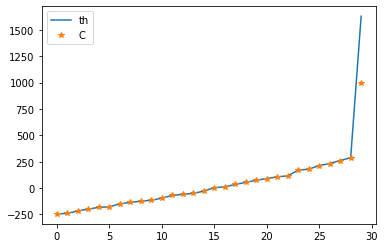

In [6]:
plt.plot(in_ev, label = "th")
plt.plot(c_ev, "*", label = "C")
plt.legend()

## Time Statistics

In [9]:
res  = pd.read_csv("../Default/results.csv", sep=" ")
res["time"] = res["tdTime"] + res["evTime"]
res

,N,p,tdTime,evTime,time
0,10,1,0.002079,0.002397,0.004476
1,10,2,0.001275,0.001454,0.002729
2,10,3,0.002071,0.002393,0.004464
3,10,4,0.001729,0.001533,0.003262
4,10,5,0.002188,0.001255,0.003443
...,...,...,...,...,...
65,100,3,76.915924,0.111900,77.027824
66,100,4,54.550441,0.077464,54.627905
67,100,5,43.862931,0.068595,43.931526
68,100,10,25.347805,0.076581,25.424386


Text(0, 0.5, 't')

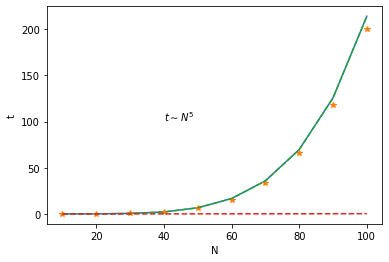

In [12]:
df1 = res.query("p==1")
Nlist = df1["N"].unique()
plt.plot(Nlist, df1["time"])
plt.plot(Nlist, 200*(Nlist/100)**5, "*")
plt.plot(Nlist, df1["tdTime"], "--")
plt.plot(Nlist, df1["evTime"], "--")
plt.text(40, 100, r'$t\sim N^5$')
plt.xlabel("N")
plt.ylabel("t")
# plt.yscale("log")
# plt.xscale("log")

In [14]:
def getStat(res, N):
    df = res.query("N=="+str(N))
    time = df["time"]
    serial = float(df.query("p==1")["time"])
    speedup = serial/df["time"]
    eff = speedup/df["p"]
    KF  = (1/speedup - 1/df["p"])/(1-1/df["p"])
    return df["p"], time, speedup, eff, KF

Text(0, 0.5, 'time')

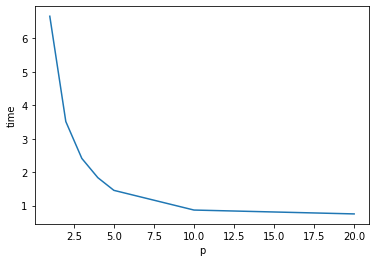

In [16]:
p, time, speedup, eff, KF  = getStat(res, N=50)
plt.plot(p, time)
plt.xlabel("p")
plt.ylabel("time")

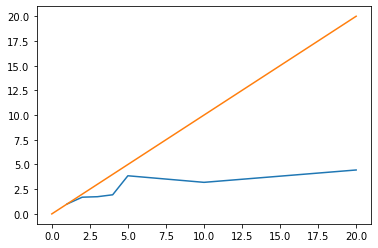

In [39]:
# p-dependence of the evTime
dff = res.query("N==50")
serial = float(dff.query("p==1")["evTime"])
pList = dff["p"]
speedup = serial/dff["evTime"]
plt.plot(pList, speedup)
plt.plot([0,20], [0,20])

(0.0, 1.0)

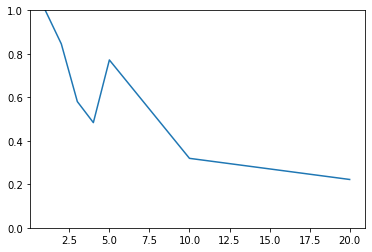

In [42]:
eff = speedup/pList
plt.plot(pList, eff)
plt.ylim(0,1)

(0.0, 1.0)

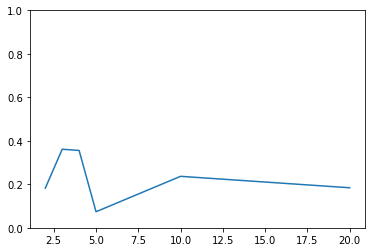

In [44]:
KF = (1/speedup - 1/pList)/(1-1/pList)
plt.plot(pList, KF)
plt.ylim(0,1)

## JM Progress Figures and Movies

In [115]:
import imageio

In [99]:
file_names = os.listdir("../results/sjResults/matrices/")
nums = np.sort([int(s.split(".")[0]) for s in file_names])

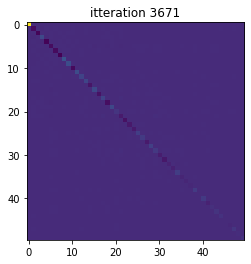

In [123]:
# build GIF
with imageio.get_writer("../results/sjResults/gifs_and_images/M.gif", mode = "I") as writer:
    for n in nums:
        AA = np.loadtxt("../results/sjResults/matrices/"+str(n)+".txt")
        plt.imshow(AA)
        plt.title("itteration " + str(n))
        plt.savefig("./A.jpeg")
        image = imageio.imread("./A.jpeg")
        writer.append_data(image)
        

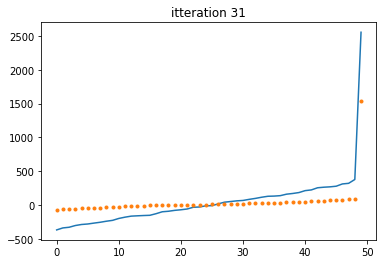

In [151]:
n = nums[30]
AA = np.loadtxt("../results/sjResults/matrices/"+str(n)+".txt")
plt.plot(eigs)
plt.plot(np.sort(np.diag(AA)), ".")
plt.title("itteration " + str(n))
plt.savefig("./B.jpeg")



In [164]:
np.linspace(1, AA.shape[0])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [194]:
from plotnine import ggplot, aes, geom_point, geom_line, ggsave, labs
import warnings
warnings.filterwarnings('ignore')

In [196]:
import tqdm

In [199]:
eigs = np.sort(np.linalg.eig(AA)[0])
with imageio.get_writer("../results/sjResults/gifs_and_images/EV.gif") as writer:
    for n in tqdm.tqdm(nums):
        AA = np.loadtxt("../results/sjResults/matrices/"+str(n)+".txt")
        df = pd.DataFrame( np.sort(np.diag(AA)), columns=["value"])
        df["i"] = np.linspace(1, AA.shape[0])
        df["true"] = eigs
        p = (
            ggplot(df,aes(x="i")) + geom_point(aes(y="value")) + geom_line(aes(y="true"), color="red") +
            labs(x="", y="", title="itteration " + str(n))
        )
        p.save("./B.jpeg")
        image = imageio.imread("./B.jpeg")
        writer.append_data(image)

#df["ev"] = np.sort(np.diag[AA])

100%|██████████| 81/81 [00:32<00:00,  2.46it/s]
